# Exploring Hacker News Posts
[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

We'll analyze the dataset and answer the following:

1. What domains were submitted most often to Hacker News?
2. What words appear most often in the headlines?
3. What authors with no domains submitted most often to Hacker News?
4. At what day of week, month and hour are the most articles submitted?
5. What is the best time to post on Hacker News?
6. How are the total numbers of upvotes changing over time? (trend)
7. What headline length leads to the most upvotes?
8. What submission hour leads to the most upvotes?

In [1]:
import pandas as pd
import collections as cl
from collections import Counter
import tldextract
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.columns = ["id", "created_at", "created_at_i", "author", "points", "url_hostname", "num_comments", "post_title"]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553933 entries, 0 to 1553932
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   id            1553933 non-null  int64 
 1   created_at    1553933 non-null  object
 2   created_at_i  1553933 non-null  int64 
 3   author        1553933 non-null  object
 4   points        1553933 non-null  int64 
 5   url_hostname  1459195 non-null  object
 6   num_comments  1553933 non-null  int64 
 7   post_title    1550597 non-null  object
dtypes: int64(4), object(4)
memory usage: 94.8+ MB


In [3]:
# Basic description of votes column
print(f"Upvotes avarege: {dataset.points.mean()}")
print(f"Upvotes median: {dataset.points.median()}")
print(f"Upvotes standard deviation: {dataset.points.std()}")
print(f"Upvotes maximun count: {dataset.points.max()}")
print(f"Upvotes minimun count: {dataset.points.min()}")
print(f"Upvotes mode: {dataset.points.mode()}")

Upvotes avarege: 10.236294615018794
Upvotes median: 1.0
Upvotes standard deviation: 40.278579841221436
Upvotes maximun count: 4271
Upvotes minimun count: 0
Upvotes mode: 0    1
Name: points, dtype: int64


### 1. What domains were submitted most often to Hacker News?

In [4]:
all_url = dataset["url_hostname"].dropna().apply(lambda url: tldextract.extract(url).registered_domain)
domain_count = Counter(all_url)
domain_common = domain_count.most_common(15)
print("Domain : Frequency")
print("---------------------")
for domain, freq in domain_common:
    print(f"{domain}  :  {freq}")

Domain : Frequency
---------------------
blogspot.com  :  36831
github.com  :  30318
techcrunch.com  :  26609
nytimes.com  :  24125
youtube.com  :  22030
google.com  :  16307
wordpress.com  :  15537
medium.com  :  12992
arstechnica.com  :  12336
wired.com  :  11070
bbc.co.uk  :  10004
wsj.com  :  9035
tumblr.com  :  8417
wikipedia.org  :  7234
businessinsider.com  :  6690


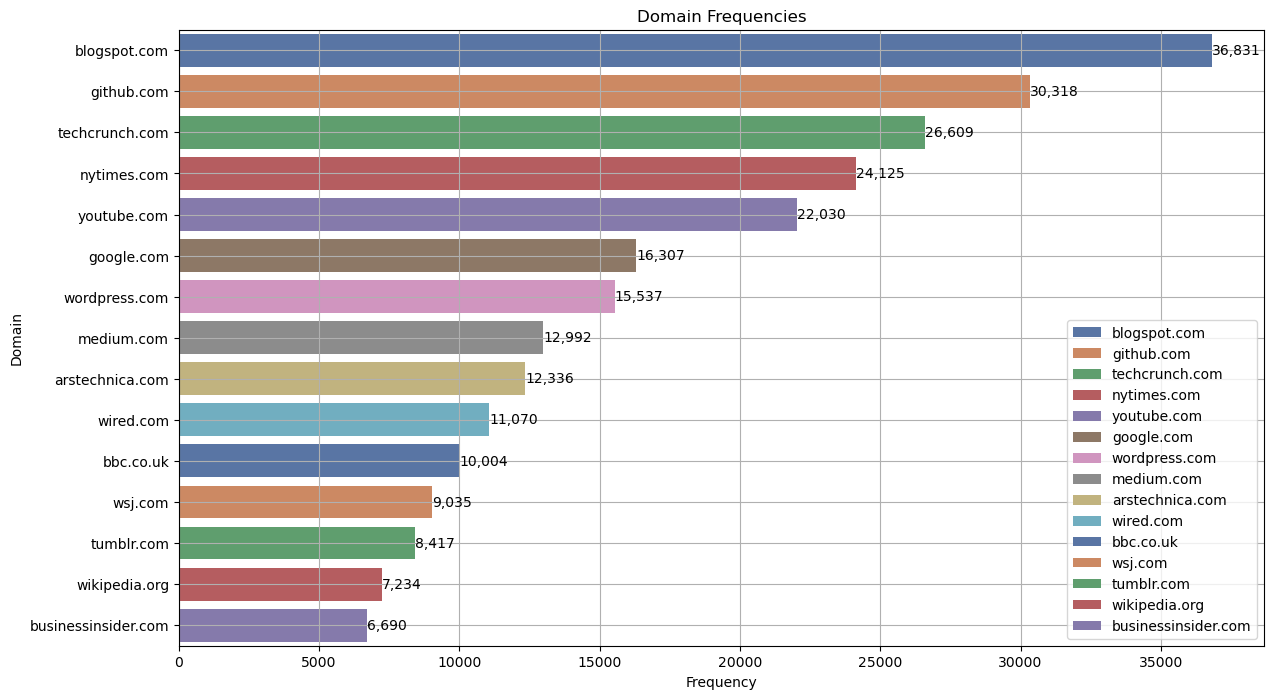

In [6]:
data1 = {
    'Domain': ['blogspot.com', 'github.com', 'techcrunch.com', 'nytimes.com', 'youtube.com', 'google.com', 'wordpress.com', 'medium.com', 'arstechnica.com', 'wired.com', 'bbc.co.uk', 'wsj.com', 'tumblr.com', 'wikipedia.org', 'businessinsider.com'],
    'Frequency': [36831, 30318, 26609, 24125, 22030, 16307, 15537, 12992, 12336, 11070, 10004, 9035, 8417, 7234, 6690]
}

df1 = pd.DataFrame(data1)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Frequency', y='Domain', data=df1, hue=['blogspot.com', 'github.com', 'techcrunch.com', 'nytimes.com', 'youtube.com', 'google.com', 'wordpress.com', 'medium.com', 'arstechnica.com', 'wired.com', 'bbc.co.uk', 'wsj.com', 'tumblr.com', 'wikipedia.org', 'businessinsider.com'], palette='deep', legend=True)

plt.title('Domain Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Domain')

plt.grid(True)

for index, value in enumerate(df1['Frequency']):
    barplot.text(value, index, f'{value:,}', va='center')
plt.show()

### 2. What words appear most often in the headlines? (I'm considering a minimum of 2 characters word only and banning some words before counting)

In [7]:
all_txt = " ".join(dataset["post_title"].dropna().values)
words = re.findall(r"\b\w{2,}\b", all_txt.lower())
banned_words = ["the", "to", "of", "for", "in", "on", "and", "at", "your", "you", "is", "hn", "an", "are", "by", "with", "it", "do","be","that","like","from"]
filtered_words = [word for word in words if word not in banned_words]
words_count = Counter(filtered_words)
words_common = words_count.most_common(15)
print("Word : Frequency")
print("------------")
for word, freq in words_common:
    print(f"{word} : {freq}")

Word : Frequency
------------
how : 85921
ask : 59406
google : 57591
new : 51911
what : 48114
why : 44329
web : 33191
show : 32907
app : 30492
startup : 29932
facebook : 27838
apple : 26387
can : 26037
data : 25048
not : 24593


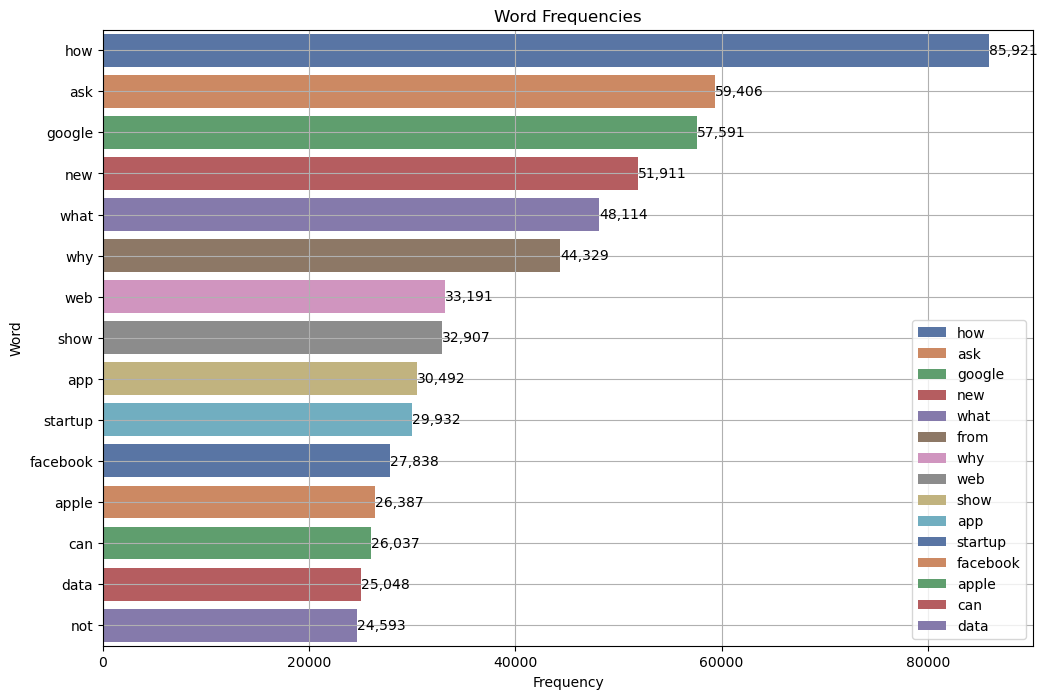

In [9]:
data2 = {
    "Word": ["how", "ask", "google", "new", "what", "why", "web", "show", "app", "startup", "facebook", "apple", "can", "data", "not"],
    "Frequency": [85921, 59406, 57591, 51911, 48114, 44329, 33191, 32907, 30492, 29932, 27838, 26387, 26037, 25048, 24593]
}
df2 = pd.DataFrame(data2)

plt.figure(figsize=(12, 8))
sns.barplot(x="Frequency", y="Word", data=df2, hue=["how", "ask", "google", "new", "what", "from", "why", "web", "show", "app", "startup", "facebook", "apple", "can", "data"], palette="deep")

plt.title("Word Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.grid(True)
for index, value in enumerate(df2["Frequency"]):
    plt.text(value, index, f"{value:,}", va="center")

plt.show()

### 3. What authors with no domains submitted most often to Hacker News?

In [10]:
authors = cl.Counter(dataset["author"][dataset["url_hostname"].isnull()])
common_authors = authors.most_common(10)

for author, freq in common_authors:
    print(f"{author}: {freq}")

print(f"Total null values for url_hostname column: {dataset["url_hostname"].isnull().sum()}")

amichail: 525
anujkk: 143
rokhayakebe: 137
marcamillion: 124
hoodoof: 114
andrewstuart: 114
whoishiring: 110
ColinWright: 110
petervandijck: 109
diminium: 105
Total null values for url_hostname column: 94738


### 4. At what day of week, month and hour are the most articles submitted?

In [11]:
dataset["created_at"] = pd.to_datetime(dataset["created_at"],format="ISO8601")

In [12]:
dataset["day_of_week"] = dataset["created_at"].dt.day_name()
dataset["month"] = dataset["created_at"].dt.month_name()
dataset["hour"] = dataset["created_at"].dt.hour
dataset["minute"] = dataset["created_at"].dt.minute

In [13]:
most_common_day = dataset["day_of_week"].value_counts().idxmax() 
most_common_month = dataset["month"].value_counts().idxmax() 
most_common_hour = dataset["hour"].value_counts().idxmax()
print(f"{most_common_day} is the DAY most articles were submitted.")
print(f"{most_common_month} is the MONTH most articles were submitted.")
print(f"{most_common_hour}:00 is the HOUR most articles were submitted.")

Tuesday is the DAY most articles were submitted.
March is the MONTH most articles were submitted.
16:00 is the HOUR most articles were submitted.


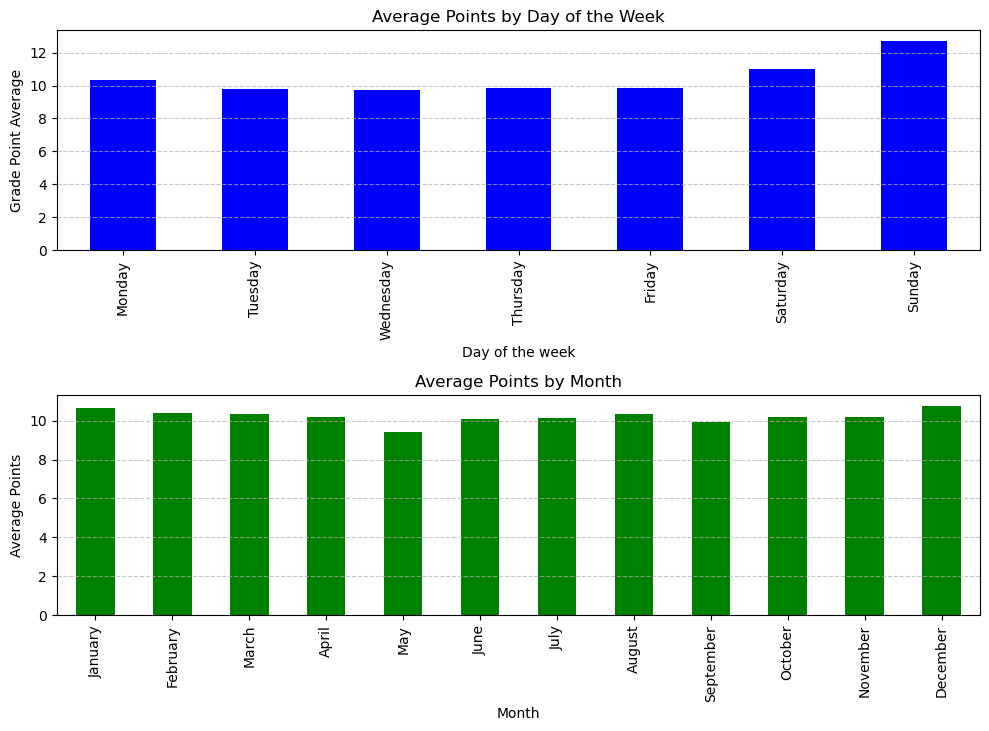

In [14]:
# Configure the graphs for visualization
plt.figure(figsize=(10, 10))

# Graph 1: Average points by day of the week
plt.subplot(3, 1, 1)
day_of_week_avg = dataset.groupby("day_of_week")["points"].mean().reindex([
"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
day_of_week_avg.plot(kind="bar", color="blue")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.title("Average Points by Day of the Week")
plt.xlabel("Day of the week")
plt.ylabel("Grade Point Average")

# Graph 2: Average points by month
plt.subplot(3, 1, 2)
month_avg = dataset.groupby("month")["points"].mean().reindex([
 "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
month_avg.plot(kind="bar", color="green")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.title("Average Points by Month")
plt.xlabel("Month")
plt.ylabel("Average Points")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the graphs
plt.show()

### 5. What is the best time to post on Hacker News?

Text(0, 0.5, 'Average Points')

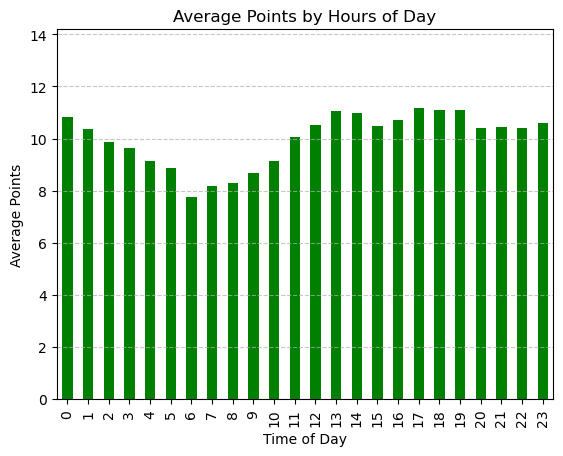

In [15]:
hourly_points = dataset.groupby("hour")["points"].sum()
hour_avg = dataset.groupby("hour")["points"].mean()
hour_avg.plot(kind="bar", color= "green")
plt.ylim(0, hour_avg.max() + 3)
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.title("Average Points by Hours of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Points")

### 6. How are the total numbers of upvotes changing over time? (trend)

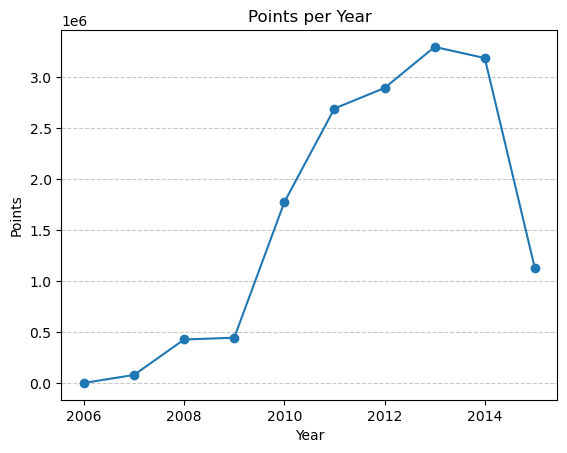

In [16]:
dataset["year"] = dataset["created_at"].dt.year
yearly_points = dataset.groupby("year")["points"].sum()
plt.plot(yearly_points.index, yearly_points.values, marker="o", linestyle="-")
plt.title("Points per Year") 
plt.xlabel("Year") 
plt.ylabel("Points")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()

### 7. What headline length leads to the most upvotes?

On average, the title that received the most upvotes (points) has 38.307 characters, based on top 1000 voted posts.


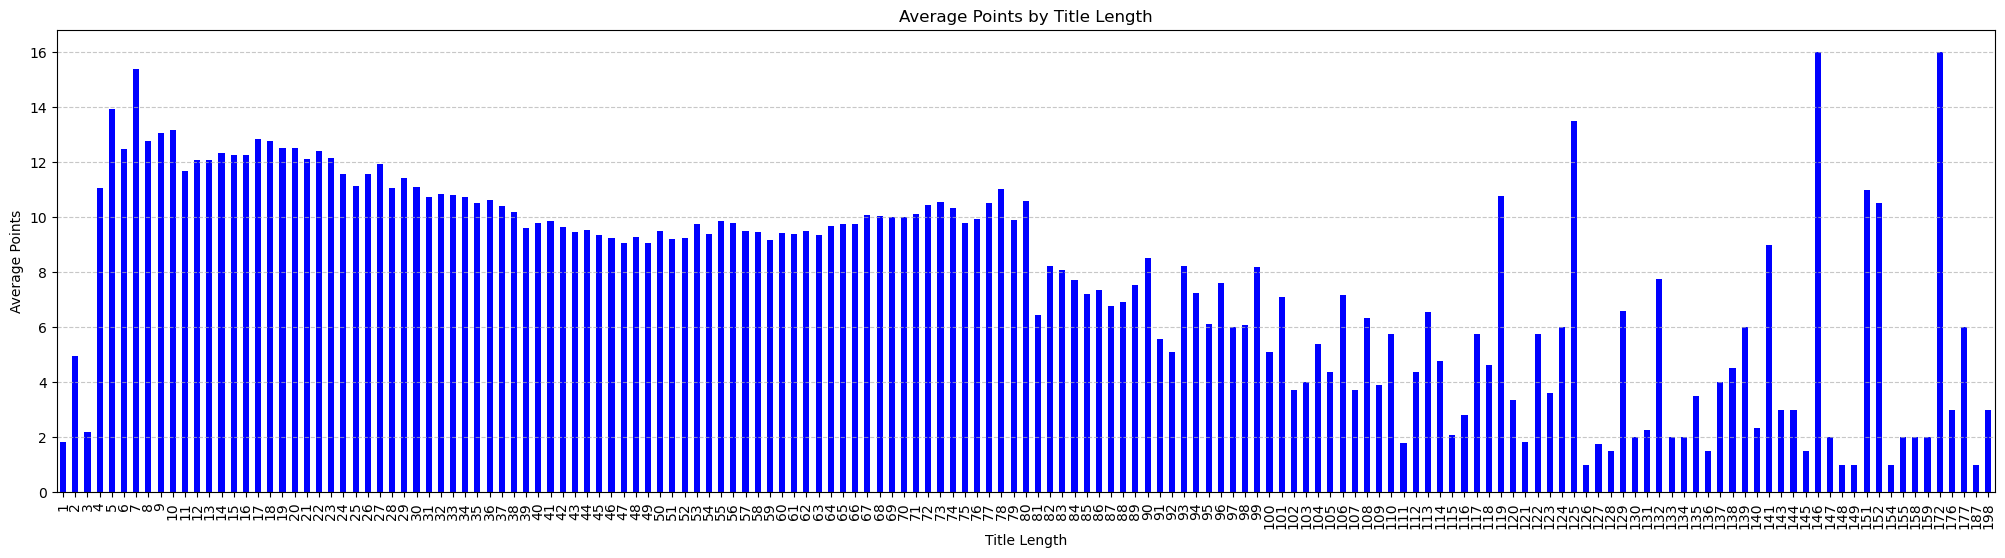

In [17]:
def title_length_function(string):
    return len(str(string))

dataset["title_length"] = dataset["post_title"].apply(title_length_function)

best_length = dataset[["points", "title_length"]].sort_values("points", ascending=False)[:1000]["title_length"].mean()
print(f"On average, the title that received the most upvotes (points) has {best_length} characters, based on top 1000 voted posts.")

title_length_avg = dataset.groupby("title_length")["points"].mean()

plt.figure(figsize=(25, 6))
title_length_avg.plot(kind="bar", color="blue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Average Points by Title Length")
plt.xlabel("Title Length")
plt.ylabel("Average Points")
plt.show()

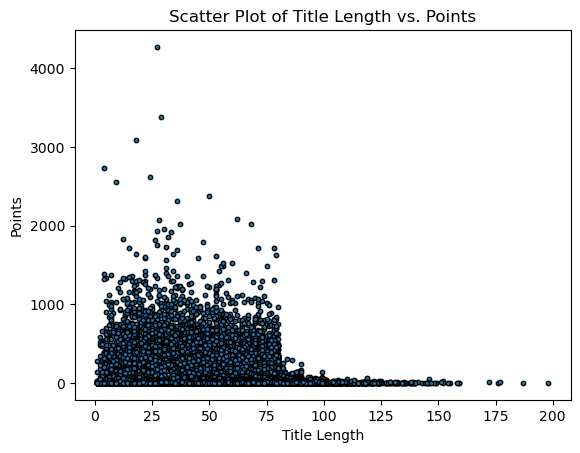

In [18]:
plt.scatter(dataset["title_length"], dataset["points"], s=10, edgecolors="black")
plt.title("Scatter Plot of Title Length vs. Points")
plt.xlabel("Title Length")
plt.ylabel("Points")
plt.show()

### 8. What submission hour leads to the most upvotes?

The submission time that leads to the highest number of upvotes is 17:00 with a total ammount of 1120520 upvotes.


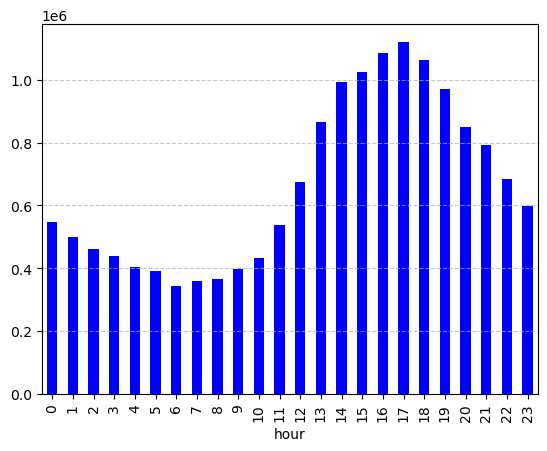

In [19]:
hourly_upvotes = dataset.groupby("hour")["points"].sum()
most_upvotes_hour = hourly_upvotes.idxmax()
most_upvotes_value = hourly_upvotes.max()
print(f"The submission time that leads to the highest number of upvotes is {most_upvotes_hour}:00 with a total ammount of {most_upvotes_value} upvotes.")
hourly_upvotes.plot(kind="bar", color="blue");
plt.grid(axis="y", linestyle="--", alpha=0.7)

### 9. Do Ask HN or Show HN receive more comments on average?

<BarContainer object of 2 artists>

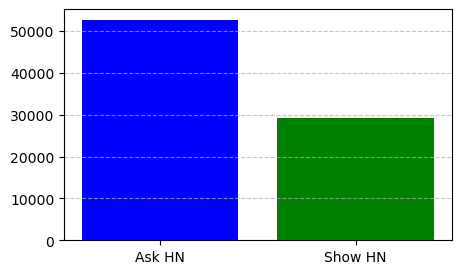

In [22]:
dataset["post_title"].fillna("", inplace=True)
ask_post = dataset[dataset["post_title"].str.startswith("Ask HN:")]
show_post = dataset[dataset["post_title"].str.startswith("Show HN")]
counts = [len(ask_post), len(show_post)]
labels = ["Ask HN", "Show HN"]
plt.figure(figsize=(5, 3))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.bar(labels, counts, color=["blue", "green"])

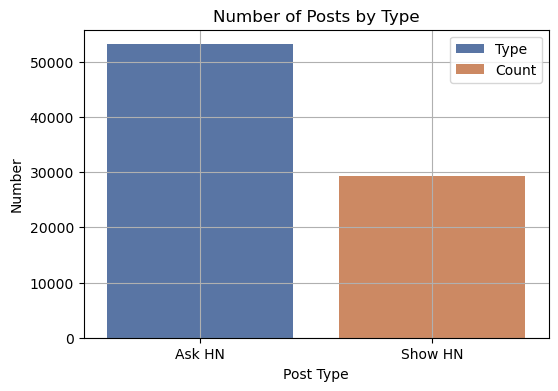

In [21]:
# Another method of plotting the same as earlier (but faster). Idk the reason but Seaborn seams to deal better with large amount of lines
ask_count = dataset["post_title"].str.startswith("Ask HN").sum()
show_count = dataset["post_title"].str.startswith("Show HN").sum()


count_data = pd.DataFrame({
    "Type": ["Ask HN", "Show HN"],
    "Count": [ask_count, show_count]
})

plt.figure(figsize=(6, 4))
sns.barplot(x="Type", y="Count", data=count_data, hue=["Type", "Count"], palette="deep")
plt.grid(True)
plt.title("Number of Posts by Type")
plt.xlabel("Post Type")
plt.ylabel("Number")
plt.show()